ORIE 4580:  The Central Limit Theorem
=====
Sid Banerjee, Cornell

Notebook demonstrating how sums of random variables behave, and in particular, the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem)

In [2]:
# Make sure we have the packages we need
import numpy as np
from scipy import stats
import math

# Configuring matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,8)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.style.use('dark_background')
plt.rcParams["image.cmap"] = 'Set3'

# Choosing a colormap for the plot colors
cmap=plt.get_cmap('Set3')

## Normal Distribution

A Normal random variable $$X\sim\mathcal{N}(\mu,\sigma^2)$$ with mean $\mu$ and standard deviation $\sigma$ has pdf given by:

$$ f(x|\mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}} e^{ -\frac{(x-\mu)^2}{2\sigma^2} }$$

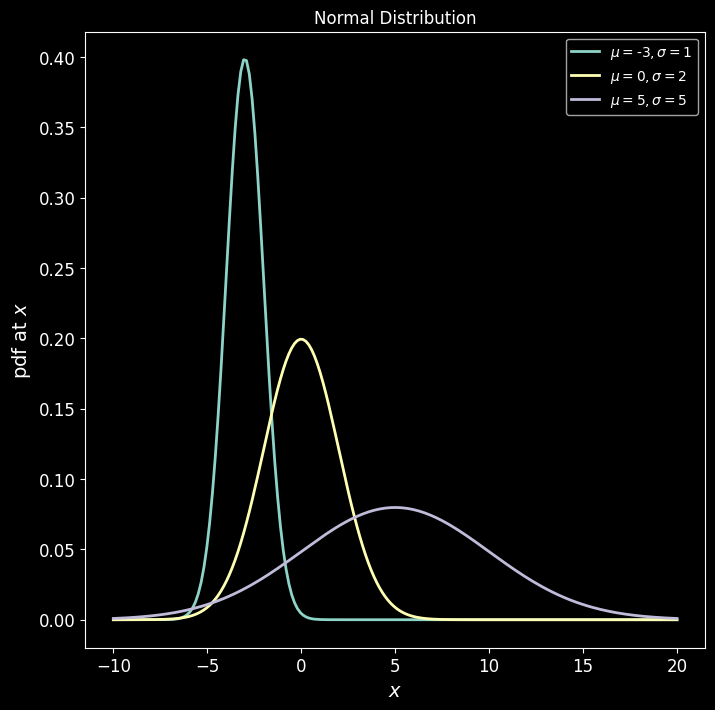

In [3]:
x = np.linspace(-10,20, num=200)

for mu, sigma in zip([-3, 0, 5], [1, 2, 5]):
    plt.plot(x, stats.norm.pdf(x, mu, sigma), lw=2, label = r"$\mu = $"+ str(mu) +r"$, \sigma=$"+ str(sigma))

plt.legend(loc = 1)
plt.title("Normal Distribution")
plt.xlabel("$x$")
plt.ylabel("pdf at $x$")
plt.show()

One important property of the Normal distribution is that it is 'closed under linear combinations', i.e., the distribution of a sum of Normal rvs is still Normally distributed. Formally, if $X_1, X_2$ are iid $\mathcal{N}(0,1)$ rvs, and $Y=aX_1 + bX_2$, then $Y\sim\mathcal{N}(0,a^2+b^2)$

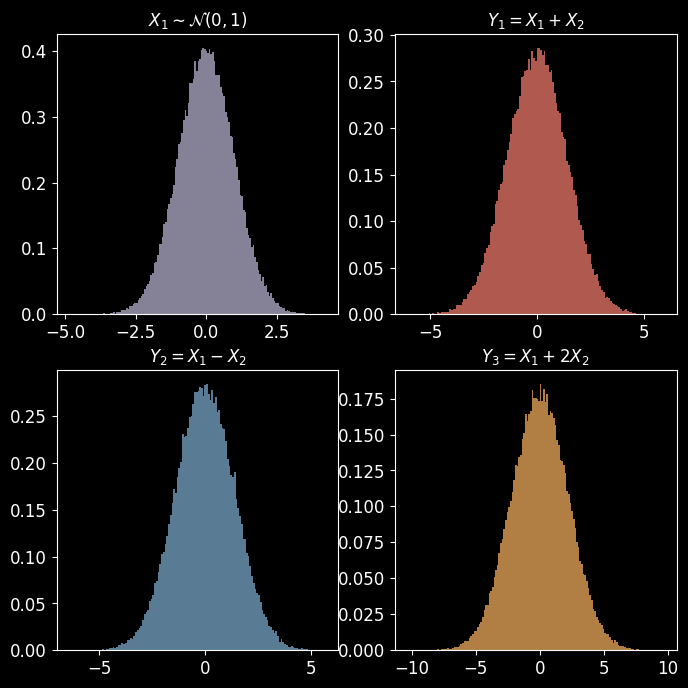

In [18]:
# Number of samples
N = 100000

# Initializing the random number generator seed
np.random.seed(0)

x_1 = np.random.normal(0,1,N)
x_2 = np.random.normal(0,1,N)
plt.subplot(2,2,1)
plt.hist(x_1, bins = 'auto', alpha = 0.7 ,density = True, color=cmap(2))
plt.title(r'$X_1\sim\mathcal{N}(0,1)$')

y_1 = x_1 + x_2
plt.subplot(2,2,2)
plt.hist(y_1, bins = 'auto', alpha = 0.7 ,density = True, color=cmap(3))
plt.title(r'$Y_1=X_1+X_2$')

y_2 = x_1 - x_2
plt.subplot(2,2,3)
plt.hist(y_2, bins = 'auto', alpha = 0.7 ,density = True,color=cmap(4))
plt.title(r'$Y_2=X_1-X_2$')

y_3 = x_1 + 2*x_2
plt.subplot(2,2,4)
plt.hist(y_3, bins = 'auto', alpha = 0.7 ,density = True, color=cmap(5))
plt.title(r'$Y_3=X_1+2X_2$')


plt.show()

### Why do we care about the Normal distribution?

Because of the Central Limit Theorem!

However, we should be careful to understand exactly what it says

#### Common folk statement:

> "If your data is the sum of many independent processes, it is very close to being normally distributed."

Let's now see if this is correct.

## Sums and averages of uniform random variables

Suppose $X_1,X_2,\ldots,X_n$ are i.i.d random variables, with each $X_i\sim\,Uniform[0,1]$. We want to understand the behavior of sums and averages of these variables; in particular, we are interested in:

\begin{align}
S_k &= \sum_{i=1}^kX_i\\
\hat{X}_k &= \frac{1}{k}\sum_{i=1}^kX_i
\end{align}

Let us simulate to see how these look.

In [28]:
# Generating the samples

# Number of samples
N = 100000

# Initializing the random number generator seed
np.random.seed(0)

x_sum = []
x_avg = []
k_max = 6
for k in np.arange(k_max)+1:
    X = np.random.rand(k,N)
    x_sum.append(np.sum(X,0))
    x_avg.append(np.sum(X,0)/k)

### Sum of iid random variables $S_k$

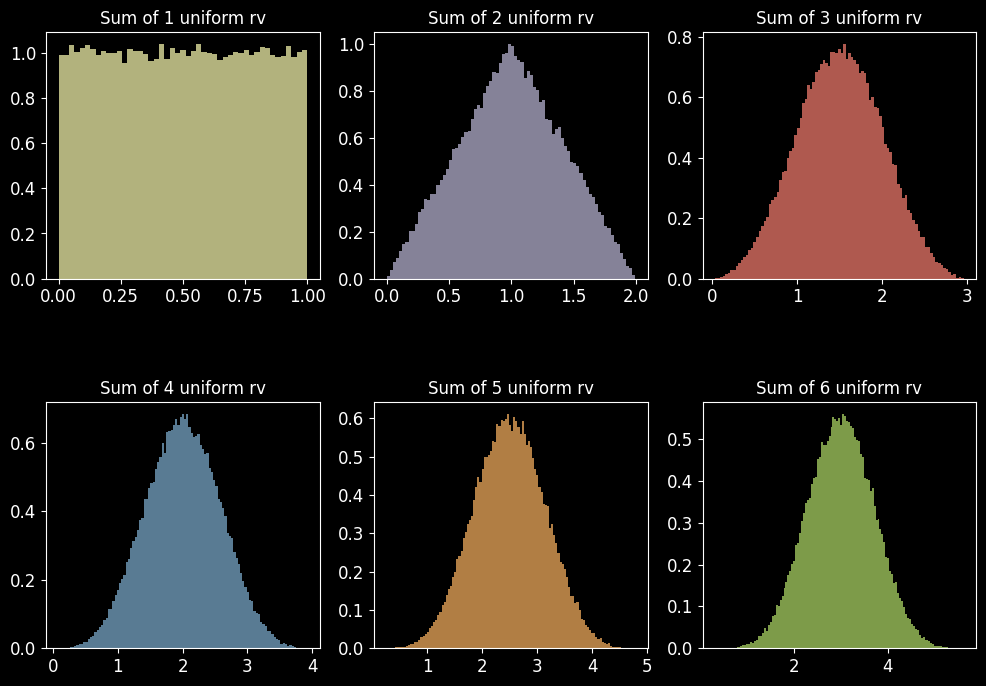

In [32]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(hspace=.5)

for k in range(k_max):
    plt.subplot(2,3,k+1)
    plt.hist(x_sum[k], bins = 'auto', alpha = 0.7 ,density = True, label='k=' + str(k+1),color=cmap(k+1))
    plt.title("Sum of " + str(k+1) + " uniform rv")

plt.show()

### Avg of iid random variables $\hat{X}_k$

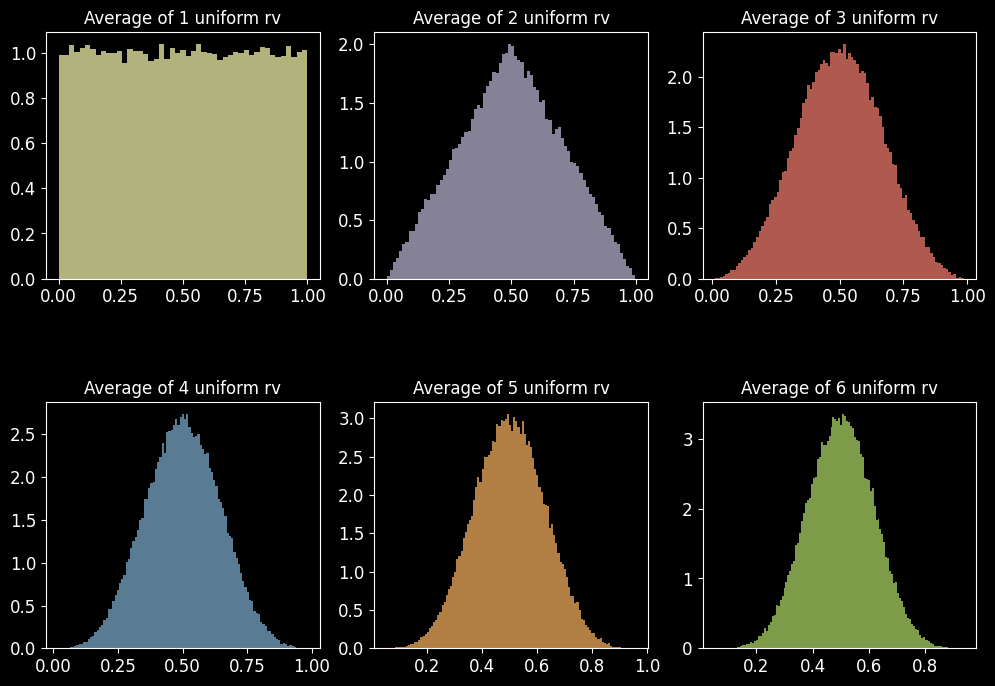

In [34]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(hspace=.5)

for k in range(k_max):
    plt.subplot(2,3,k+1)
    plt.hist(x_avg[k], bins = 'auto', alpha = 0.7 ,density = True, label='k=' + str(k+1),color=cmap(k+1))
    plt.title("Average of " + str(k+1) + " uniform rv")

plt.show()

### Comparing on same scale

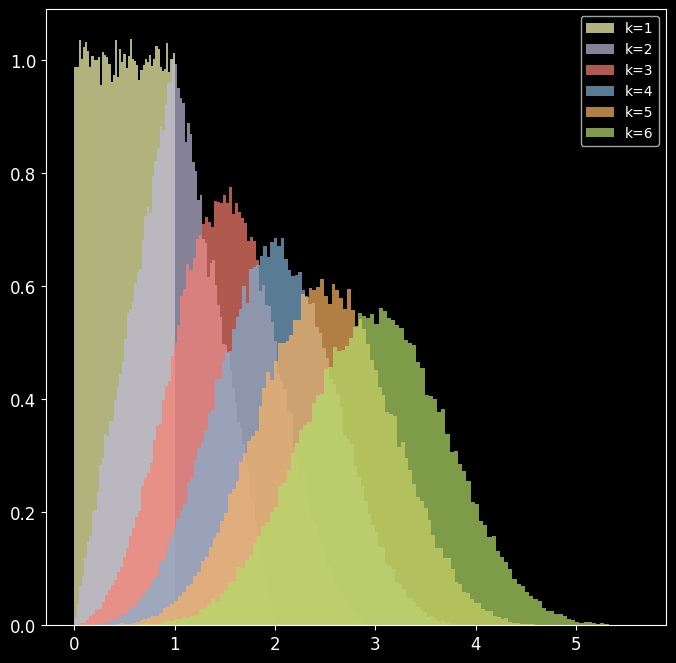

In [39]:
for k in range(k_max):
    plt.hist(x_sum[k], bins = 'auto', alpha = 0.7 ,density = True, label='k=' + str(k+1),color=cmap(k+1))

plt.legend(loc=1)
plt.show()

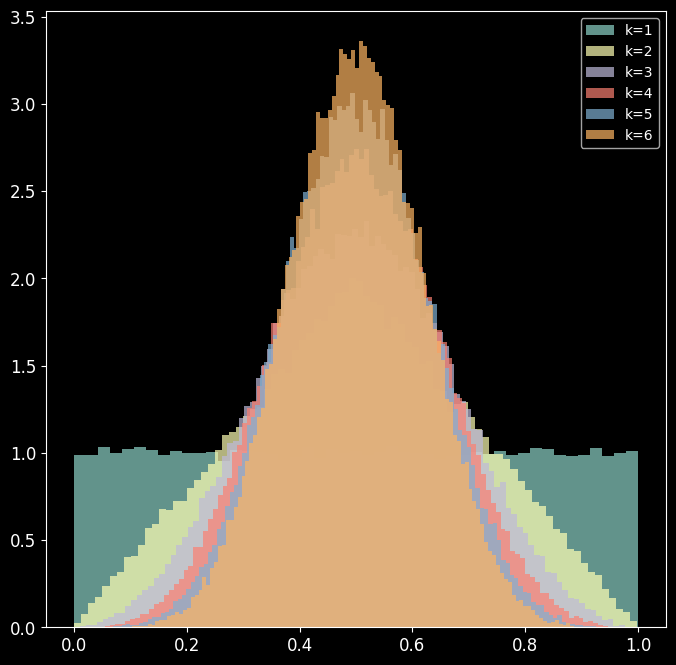

In [40]:
for k in range(k_max):
    plt.hist(x_avg[k], bins = 'auto', alpha = 0.7 ,density = True, label='k=' + str(k+1),color=cmap(k))

plt.legend(loc=1)
plt.show()

## Law of Large Numbers and CLT

*What do the above plots converge to?*

At first glance, they 'look normal' -- however, even if we add an infinite number of variables, the distribution does not converge to a normal! Can you see why? (note the maximum and minimum). In fact, the sum does not converge to anything...


#### The law of large numbers

The average however does converge to a delta distribution at the mean $\mu$

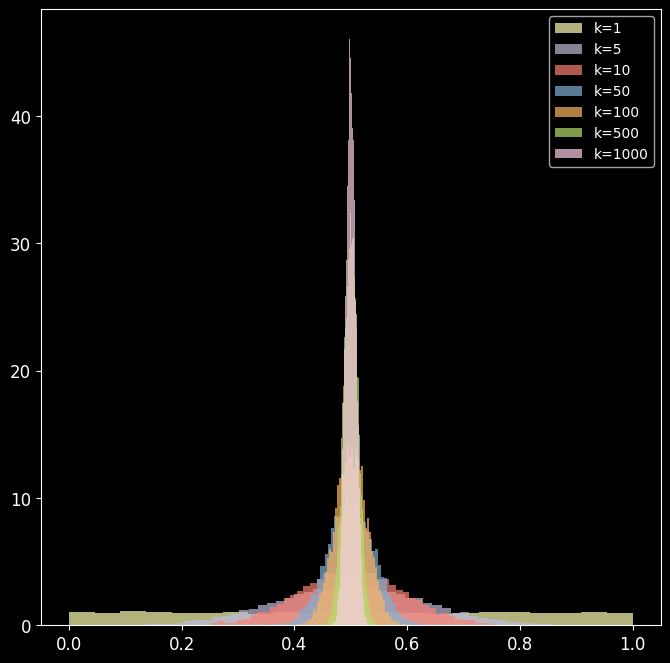

In [42]:
# Number of samples
N = 10000
# Initializing the random number generator seed
np.random.seed(0)

k_list = [1,5,10,50,100,500,1000]
x_avg = []
i = 1
for k in k_list:
    X = np.random.rand(k,N)
    x_avg.append(np.sum(X,0)/k)
    plt.hist(x_avg[-1], bins = 'auto', density = True,
             alpha = 0.7, label='k=' + str(k),color=cmap(i))
    i = i+1

plt.legend(loc=1)
plt.show()

#### The central limit theorem

To get a sequence of rvs that do converge to a standard normal random variable, we need to:
* Center the rv before summing
* Scale by $\sqrt{k}$ instead of $k$

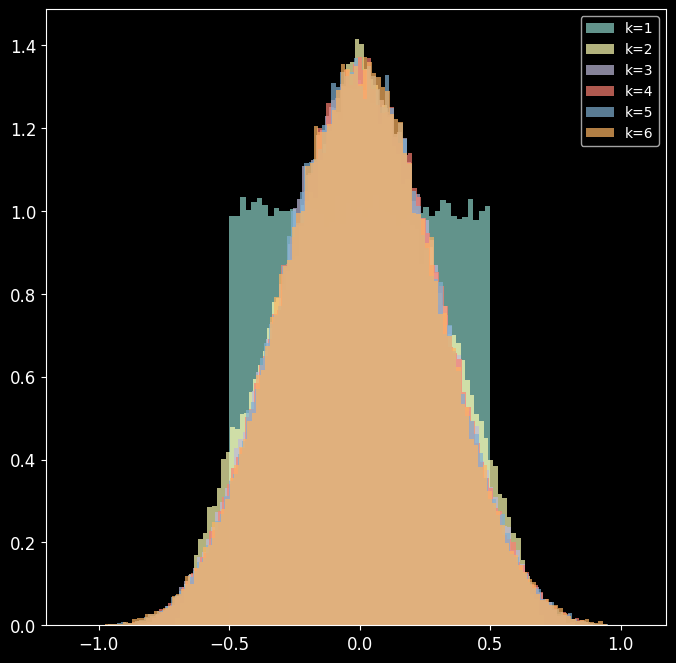

In [45]:
x_cent = []
for k in np.arange(len(x_sum)):
    x_cent.append(x_sum[k] - 0.5*(k+1))
    n, bins, patches = plt.hist(x_cent[k]/np.sqrt(k+1), bins = 'auto', density = True,
                                alpha = 0.7, label='k=' + str(k+1),color=cmap(k))

plt.legend(loc=1)
plt.show()

Adding a Gaussian pdf for comparison

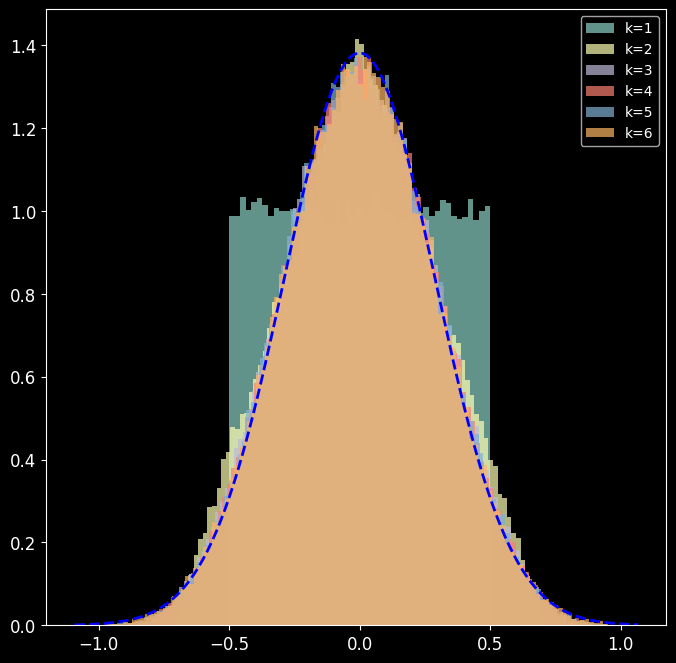

In [47]:
for k in np.arange(len(x_cent)):
    n, bins, patches = plt.hist(x_cent[k]/np.sqrt(k+1), bins = 'auto', density = True,
                                alpha = 0.7, label='k=' + str(k+1),color=cmap(k))

# add a Gaussian pdf to the plot
mu = 0
sigma = np.sqrt(1.0/12.0)
y = stats.norm.pdf(bins,mu,sigma)
plt.plot(bins, y, 'b--', linewidth=2)


plt.legend(loc=1)
plt.show()

### Sums of other distributions

#### Exponential Distribution

An Exponential distribution with rate $\lambda$ is defined as:

$$ f(x; \lambda) = \lambda e^{ -\lambda x}$$

The mean of the Exponential$(\lambda)$ distribution is $\frac{1}{\lambda}$ (typically denoted as $\beta$), and is sometimes used to parametrize the distribution instead of the rate -- in particular, the *scale* parameter in the Numpy function numpy.random.exponential corresponds to $1/\lambda$ (see https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.exponential.html).

The variance of Exponential$(\lambda)$ is $\frac{1}{\lambda^2}$

In [56]:
N = 100000

np.random.seed(0)

x_exp_sum = []
for k in np.arange(10):
    X = np.random.exponential(1,(k+1,N))
    x_exp_sum.append(np.sum(X,0))

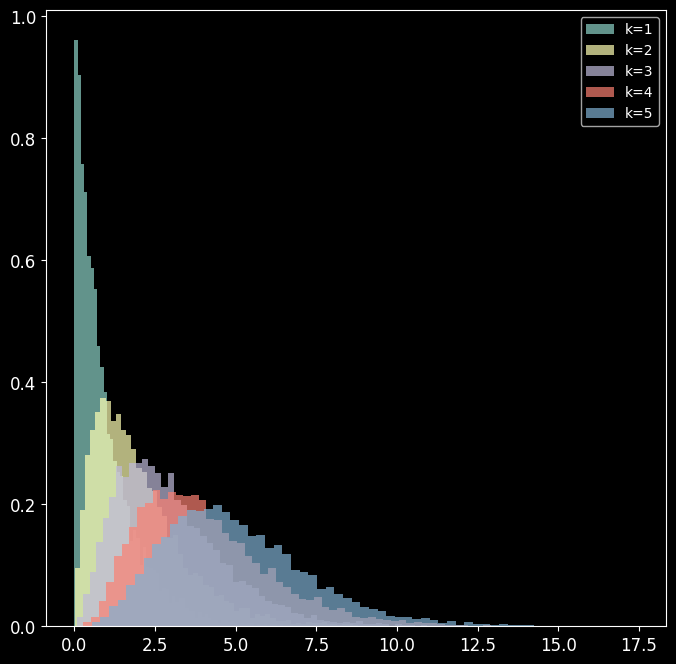

In [53]:
for k in np.arange(5):
    n,bins,patches = plt.hist(x_exp_sum[k], bins = 'auto', density = True,
                              alpha = 0.7, label='k=' + str(k+1),color=cmap(k))

plt.legend(loc=1)
plt.show()

The sum of $k$ Exponential$(\lambda)$ variables comes up often in studying discrete event simulations; the corresponding distribution is called an Erlang distribution with shape $k$ and rate $\lambda$ (https://en.wikipedia.org/wiki/Erlang_distribution). The distribution parameters are available in scipy.stats

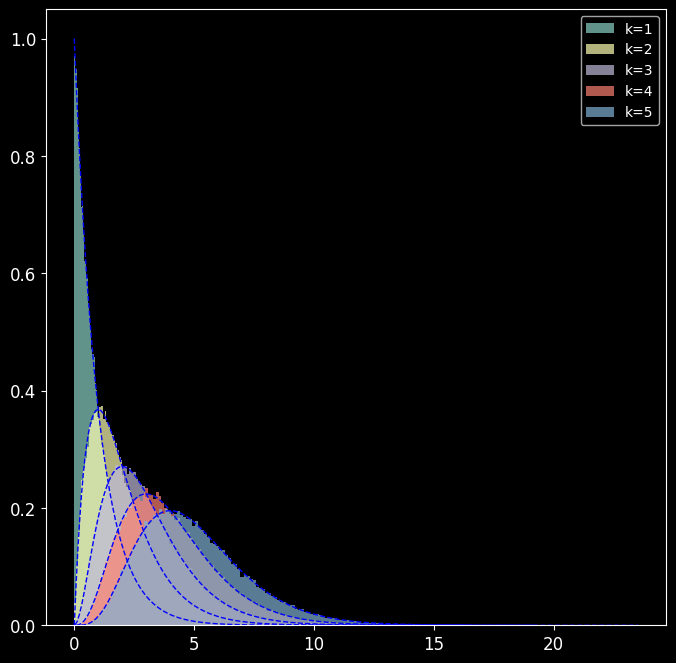

In [57]:
for k in np.arange(5):
    n,bins,patches = plt.hist(x_exp_sum[k], bins = 'auto', density = True,
                              alpha = 0.7, label='k=' + str(k+1),color=cmap(k))
    y = stats.erlang.pdf(bins,k+1,scale = 1)
    plt.plot(bins, y, 'b--', linewidth=1)

plt.legend(loc=1)
plt.show()

To get the CLT behavior, we again center and scale by $\sqrt{k}$.

<ipython-input-58-d8f138aa67ee>:8: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  alpha = 0.7, label='k=' + np.str(i),color=cmap(k))


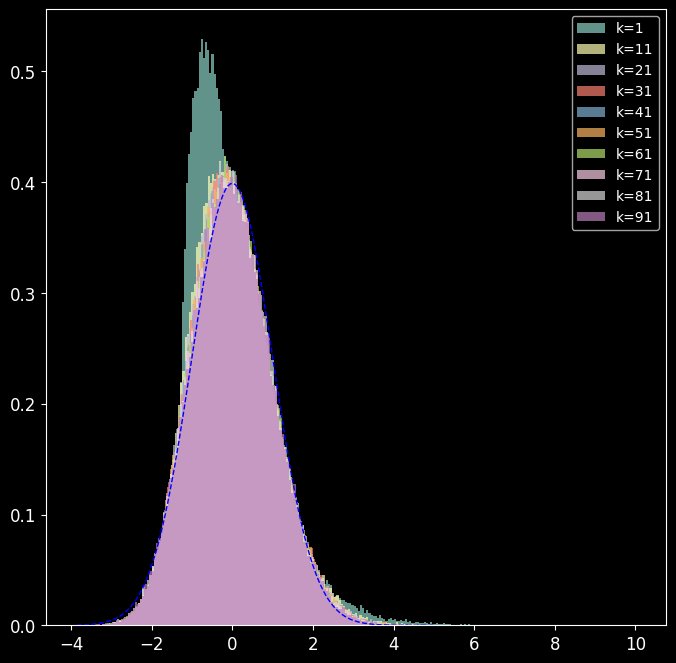

In [58]:
x_sum = []
for k in np.arange(10):
    i = 10*k+1
    X = np.random.exponential(1,(i+1,N))
    x_exp_sum.append(np.sum(X,0))

    n,bins,patches = plt.hist((x_exp_sum[-1]-(i+1)*1)/np.sqrt(i+1), bins = 'auto', density = True,
                              alpha = 0.7, label='k=' + str(i),color=cmap(k))


mu = 0
sigma = 1.0
y = stats.norm.pdf(bins,mu,sigma)
plt.plot(bins, y, 'b--', linewidth=1)

plt.legend(loc=1)
plt.show()

#### Poisson rv

The CLT also works for discrete rvs, although it is interesting to see how the convergence occurs. As an example, consider the Poisson distribution with rate $\lambda$, which has the pmf:

$$ p(k; \lambda) = \frac{e^{ -\lambda}(\lambda)^k}{k!}\quad,\quad k\in\{0,1,2,\ldots\}$$

The mean and variance of the Poisson$(\lambda)$ distribution are both $\lambda$. It is available via the Numpy function numpy.random.poisson (see https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.poisson.html).


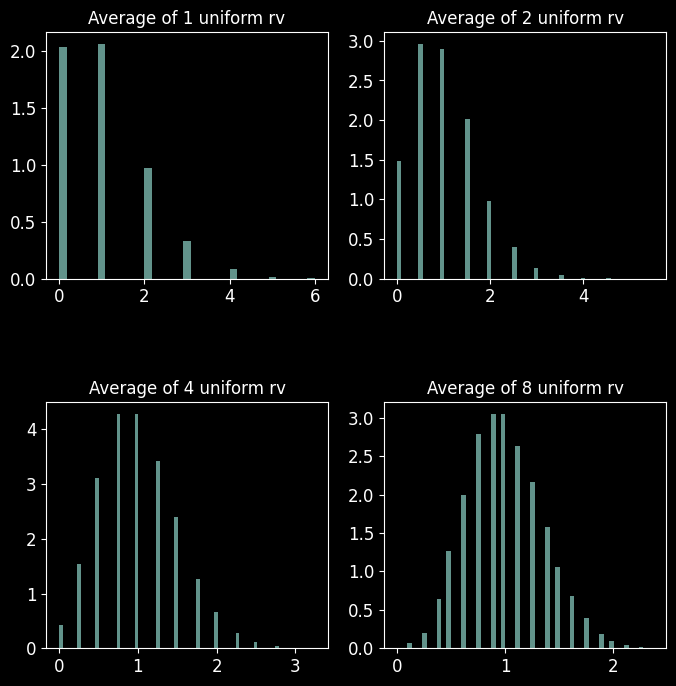

In [60]:
N = 10000

np.random.seed(0)

# Increasing spacing between plots
plt.subplots_adjust(hspace=.5)

for i in np.arange(4):
    k = 2**i
    X = np.random.poisson(1,(k,N))
    X_avg = np.sum(X,0)/k
    plt.subplot(2,2,i+1)
    plt.hist(X_avg, bins = 'auto', density = True,
             alpha = 0.7, label='k=' + str(k))
    plt.title("Average of " + str(k) + " uniform rv")

plt.show()

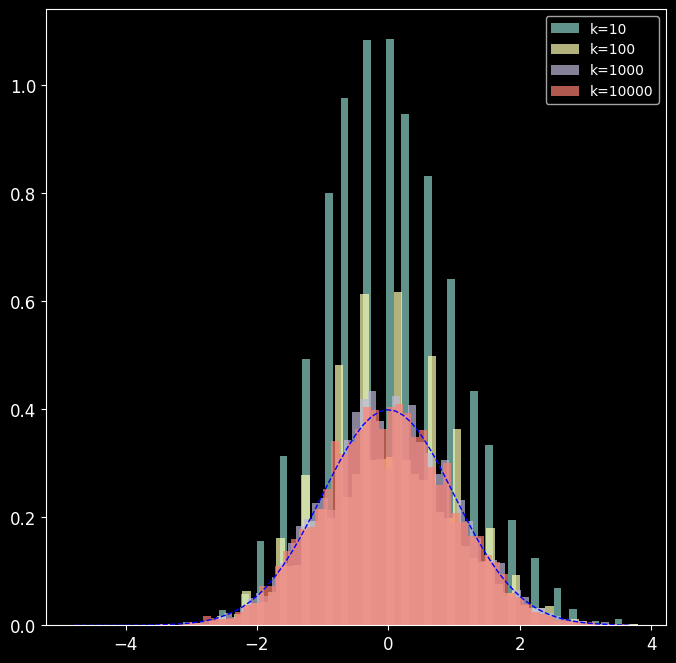

In [3]:
N = 10000

np.random.seed(0)

for i in np.arange(4)+1:
    k = 10**i
    X_cent = np.random.poisson(1,(k,N)) - 1
    n, bins, patches = plt.hist(np.sum(X_cent,0)/np.sqrt(k), bins = 'auto', density = True,
                                alpha = 0.7, label='k=' + str(k),color=cmap(i-1))

# add a Gaussian pdf
mu = 0
sigma = 1
y = stats.norm.pdf(bins,mu,sigma)
plt.plot(bins, y, 'b--', linewidth=1)

plt.legend(loc=1)
plt.show()